## Objective
Plot statistics across recordings

In [1]:
%load_ext autoreload

In [7]:
from src import meta
REC_PATHS = meta.SI_MOUSE[:]

import matplotlib.pyplot as plt
from pandas import DataFrame

import random
import numpy as np
from tqdm import tqdm
from scipy.stats import iqr

%autoreload 2
from src.data import BandpassFilter
from src.utils import random_seed

## Recording noise
Of traces without spikes

In [3]:
NUM_SAMPLES = 1000  # Number of samples from each recording to test

SAMPLE_SIZE = 200
START = 0

In [13]:
# Get RMS values
%autoreload 2
import numpy as np
from tqdm import tqdm
import data, meta, plot

In [30]:
rmses_all = []
for path in tqdm(REC_PATHS):
    # print(f"Loading recording {path}")
    recording = data.Recording(path, SAMPLE_SIZE, START, gain_to_uv=meta.GAIN_TO_UV)
    
    rmses_rec = []
    for _ in range(NUM_SAMPLES):
        sample = recording.get_sample()
        sample -= np.mean(sample)
        rms = np.sqrt(np.mean(np.square(sample)))
        rmses_rec.append(rms)
    rmses_all.append(rmses_rec)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [02:54<00:00, 29.06s/it]


In [38]:
# Plot each recording separately
%autoreload 2
import matplotlib.pyplot as plt
from plot import plot_hist_percents

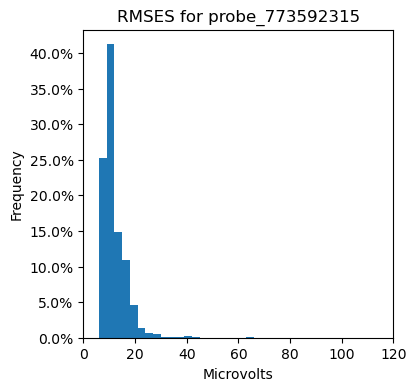

Mean:  11.83219150480628
STD:  4.6175650100548244


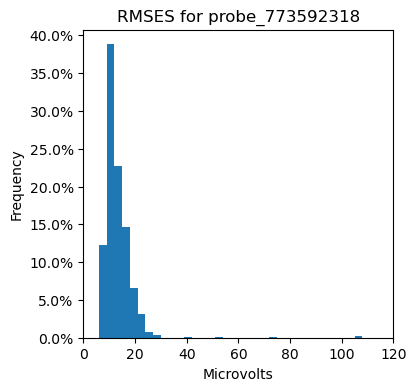

Mean:  13.909719922100868
STD:  16.632070778266883


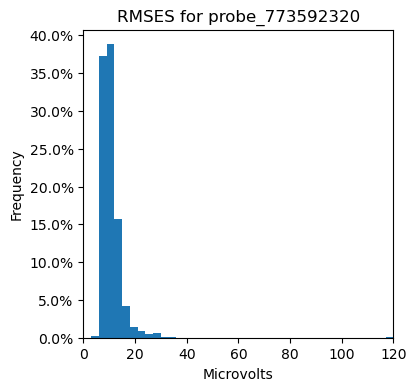

Mean:  10.888608177064219
STD:  7.266279853913529


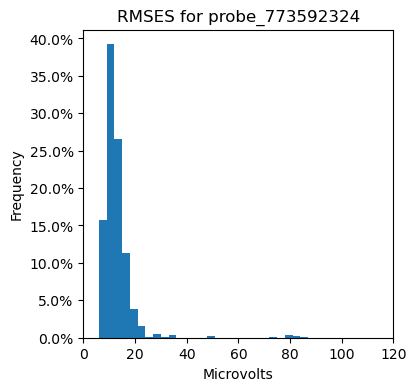

Mean:  12.787477912102906
STD:  6.973520200024004


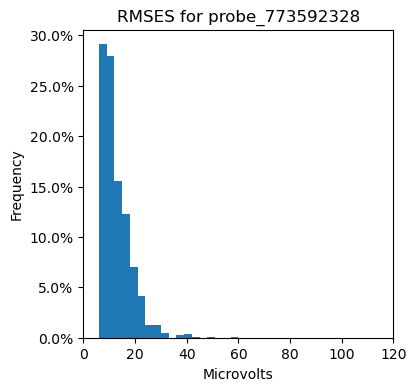

Mean:  12.790010966537585
STD:  5.85357428684818


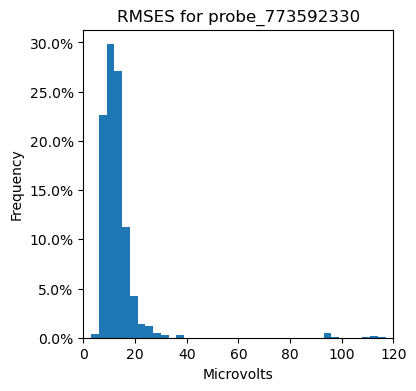

Mean:  13.178893719543906
STD:  9.901097093318368


In [41]:
for rmses_rec, rec_path in zip(rmses_all, REC_PATHS):
    plt.figure(figsize=(4, 4))
    
    plt.title(f"RMSes for {rec_path.name}")
    plot_hist_percents(rmses_rec, bins=40, range=(0, 120))
    
    plt.xlim(0, 120)
    plt.xlabel("Microvolts")
    
    plt.show()
    
    print("Mean: ", np.mean(rmses_rec))
    print("STD: ", np.std(rmses_rec))

In [14]:
recording = data.Recording(REC_PATHS[2], SAMPLE_SIZE, START, gain_to_uv=meta.GAIN_TO_UV)

11.129083333333334
17.375932777777777
8.952618888888889
15.172403888888889
13.501432777777778
3.577792777777778
0.030346111111111112
19.457494444444443
10.019958888888889
11.818406666666668
12.593141111111112
5.694977222222222
14.627709444444443
12.535340555555557
6.171786111111111
1.8213616666666668
11.840974444444445
15.041676666666666
9.048782222222222
18.71458277777778
2.379721111111111
13.827445
11.12904
14.736202222222223
2.0214183333333335
10.712692222222222
6.362673888888889
8.78662388888889
10.019827222222222
14.62780888888889
6.216816666666667
19.565562222222223
13.827457777777777
5.692243888888888
9.716845555555555
10.712102777777778
7.705510555555555
15.688250555555555
10.646335555555556
6.904471666666667
7.172671111111112
2.0214205555555558
17.77438611111111
17.375463888888888
15.316318333333333
18.267556111111112
8.952586666666667
14.61971
6.904488333333333
7.271718333333333
10.712849444444446
4.936182777777778
1.8213672222222221
10.573633333333333
1.9430883333333333
11.9

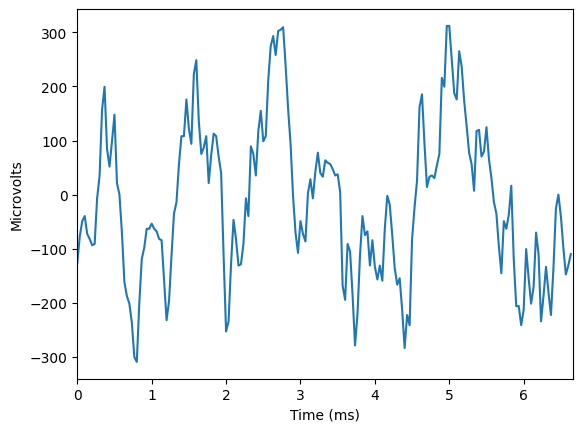

18.900723333333335
6.216815555555556
18.166177777777776
5.0280450000000005
5.692245555555556
5.692268333333333
5.453478333333334
10.020081666666666
10.712119444444445
8.012978888888888
9.285910555555555
0.030642222222222223
7.316252777777778
11.841003333333333
9.048732222222222
14.619718333333333
19.041369999999997
14.627802777777779
2.021396111111111
2.3796933333333334
15.666506666666667
17.370402777777777
10.020046666666667
14.627783888888889
7.4166944444444445
12.760022777777777
13.146994444444443
13.189205555555557
9.118902777777778
19.457519444444447
7.416885
2.3797161111111107
2.964132777777778
12.221880555555554
2.0213944444444443
10.237205555555557
15.688287222222222
9.048805
9.480902777777777
10.294763333333332
18.26756888888889
15.688289444444445
10.573545
0.03061611111111111
10.57358
13.730447777777778
6.362683888888889
6.171786111111111
10.019826111111112
6.362683888888889
8.661411666666668
18.26757222222222
10.016314444444445
7.705513333333333
11.521804444444445
18.1661511

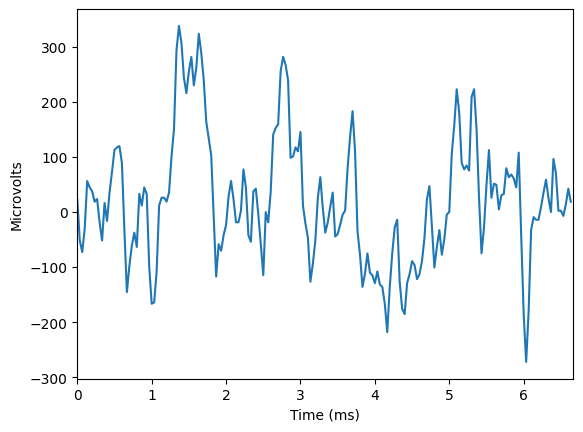

3.7059494444444443
18.154597222222222
14.61970611111111
12.535353888888888
15.172403333333333
7.551158333333333
19.041402777777776
10.712730555555556
10.573638333333333
10.040452222222223
6.171806666666667
14.627605555555556
9.010113333333333
11.333856666666666
6.9044516666666675
9.287997222222224
116.4243527650036


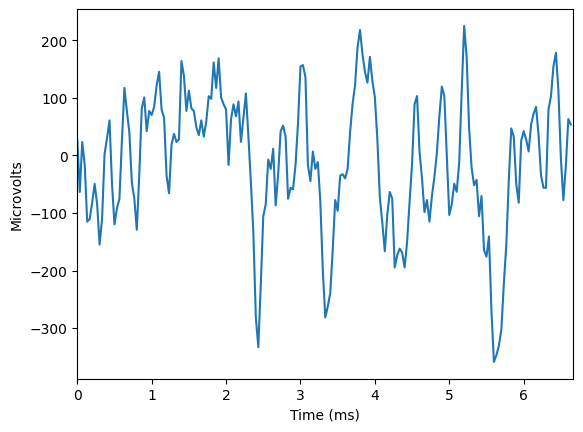

7.892905555555556
6.9172505555555555
14.928376111111112
10.712093333333334
10.237195000000002
0.030668333333333336
7.172678888888888
19.041365
7.705524444444444
0.030608333333333335
8.786621666666667
0.030505
0.001695
7.551137222222223
11.81841111111111
10.712160555555556
18.166235555555556
9.357417777777778
14.73620611111111
11.333886666666666
7.271706666666666
19.565562222222223
10.019953333333332
19.56558111111111
10.336928888888888
15.752984444444445
9.218075555555554
15.682636666666667
14.619896666666667
7.705540555555555
0.030380555555555556
9.599443333333333
7.416702777777777
18.714553333333335
6.904491111111112
16.814061111111112
10.573542222222223
10.016271111111111
2.0372194444444442
17.774391666666666
0.030637222222222222
17.37041222222222
7.461584444444444
7.416829444444445
8.810971111111112
2.3797455555555556
14.627682222222223
18.16614388888889
10.016263333333335
0.002567222222222222
17.375192777777777
10.573572222222223
18.16621888888889
14.62780888888889
0.0016611111111

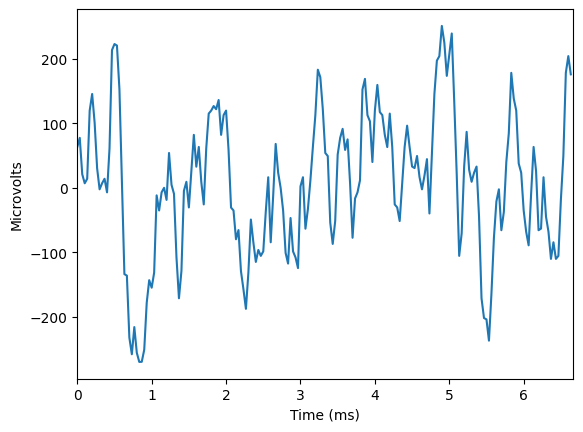

10.712107777777778
2.379646111111111
2.021351111111111
9.048731666666667
7.4167322222222225
7.416707222222223
10.29476111111111
7.461579444444444
2.3798005555555557
8.952638888888888
0.0016577777777777778
1.9430716666666668
13.501425000000001
10.712815
5.119833333333333
19.45747833333333
17.73620888888889
17.01967611111111
4.820234999999999
18.714537222222223
8.952629444444446
10.33691722222222
18.714536666666667
11.333842777777779
10.016262222222222
18.587899999999998
0.03034388888888889
13.860261111111111
9.743575555555557
0.030645555555555554
2.037221111111111
18.710795555555553
14.627655
0.030368333333333334
10.019709444444443
7.416800555555556
9.458647777777777
9.17863
0.03058111111111111
7.4168449999999995
10.336887777777777
2.379723888888889
17.019692777777777
9.480905555555555
2.037202222222222
10.646330555555556
14.627807777777777
13.146994444444443
9.113160555555556
8.155674444444445
9.573485555555555
10.016294444444444
10.020088888888889
12.221836111111111
19.457527777777777

In [20]:
for _ in range(NUM_SAMPLES):
    sample = recording.get_sample()
    rms = np.sqrt(np.mean(np.square(sample)))
    if rms > 100:
        print(rms)
        
        plt.plot(np.arange(SAMPLE_SIZE)/30, sample)
        
        plt.ylabel("Microvolts")
        plt.xlabel("Time (ms)")
        plt.xlim(0, 200/30)
        plt.show()

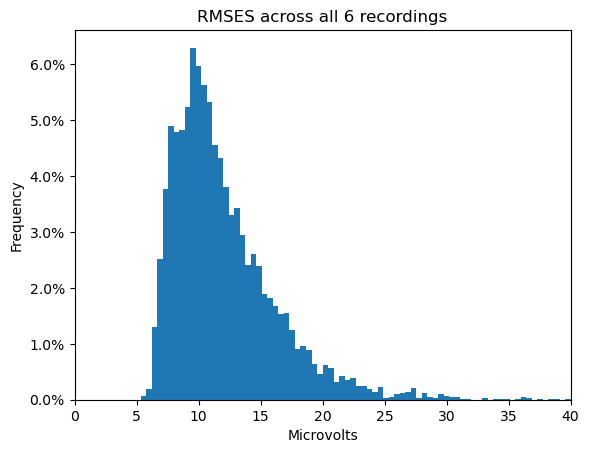

12.564483700359293
13.178893719543906


In [48]:
# Plot all recordings together
rmses_all_flat = np.array(rmses_all).flatten()

plt.title(f"RMSes across all {len(REC_PATHS)} recordings")
plot_hist_percents(rmses_all_flat, bins=90, range=(0, 40))

plt.xlim(0, 40)
plt.xlabel("Microvolts")

plt.show()

print(np.mean(rmses_all_flat))

## Number of spikes per sample
For num_wfs_probs

Pseudocode:
Iterate through E elecs:
Iterate N times:
    1. Select random window
    2. Find spikes in window
    3. If there are spikes
        a. Get ampltidues of each spike in window
        b. Calculate RMS of surrounding 50ms window
        c. Number of spikes = number of amplitudes greater than RMS * RMS_THRESH
Plot data 


In [3]:
NUM_ELECS = 100
NUM_SAMPLES = 20 #2000
RMS_THRESH = 3  # Spike has to be greater than 

REC_PATHS = meta.SI_MOUSE[:]
SAMP_FREQ = 30

SAMPLE_SIZE = SAMP_FREQ * 6  # 200
RMS_SAMPLE_SIZE = SAMP_FREQ * 50
SPIKE_WITHIN = round(SAMP_FREQ * 0.5)  # Spike amp on elec is max amp within SPIKE_WITHIN of spike time 

BANDPASS_FILTER = BandpassFilter((300, 3000))
FILTER_MARGIN = SAMP_FREQ * 5  # Based on spikeinterface's value. Prevent edge effects in analyzed data

In [4]:
rms_n_before = rms_n_after = RMS_SAMPLE_SIZE // 2 + FILTER_MARGIN
sample_n_before = sample_n_after = SAMPLE_SIZE // 2

rec_num_wfs = []
all_amps = []
for i, path in enumerate(REC_PATHS):
    print(f"Recording {i}")
    random_seed(3, silent=True)
    
    nums_wfs = {}
    rec = np.load(path / "traces.npy", mmap_mode="r")
    spike_times = np.sort(np.load(path / "sorted.npz", mmap_mode="r")["spike_times"])
    
    random_start_frame = rms_n_before
    random_end_frame = rec.shape[1]-rms_n_after
    
    for _ in tqdm(range(NUM_ELECS)):
        chan = random.randint(0, NUM_ELECS-1)    
        for _ in range(NUM_SAMPLES):
            mid_frame = random.randint(random_start_frame, random_end_frame)
            rms_window = rec[chan, mid_frame-rms_n_before:mid_frame+rms_n_after]
            median = np.median(rms_window)          
            rms_window = BANDPASS_FILTER(rms_window - median)
            rms = np.median(np.abs(rms_window)) / 0.6745
                        
            sample_window = rms_window[rms_n_before-sample_n_before:rms_n_after+sample_n_after]  
            
            spike_start_frame = mid_frame-sample_n_before
            spike_start_idx = np.searchsorted(spike_times, spike_start_frame, side="left")
            spike_end_idx = np.searchsorted(spike_times, mid_frame+sample_n_after, side="left") - 1
            # assert spike_times[spike_end_idx] - spike_times[spike_start_idx] <= 179  # No assertion should be raised
        
            count = 0
            times = []  # Testing
            for idx in range(spike_start_idx, spike_end_idx):
                frame = spike_times[idx] - spike_start_frame
                window = sample_window[max(0, frame-SPIKE_WITHIN):frame+SPIKE_WITHIN+1]
                # amp = np.abs(sample_window[frame])
                amp = np.max(np.abs(window))
                if amp >= rms * RMS_THRESH:
                    count += 1
                    n_before = SPIKE_WITHIN if frame-SPIKE_WITHIN >= 0 else frame
                    # times.append(np.argmin(sample_window[frame-n_before:frame+SPIKE_WITHIN+1]) - n_before + frame)  # Testing
                    times.append(frame)
                    all_amps.append(amp)
                    
            # Testing
            # if count == 6:
            #     plt.plot(sample_window)
            #     plt.title(f"{count} spikes")
            #     for t in times:
            #         plt.axvline(t, color="black", alpha=0.6, linestyle="dashed")
            #     plt.show()
            #     assert False
            
            if count not in nums_wfs:
                nums_wfs[count] = 1
            else:
                nums_wfs[count] += 1

            
    # total = sum(c for c in nums_wfs.values())
    nums_wfs_sorted = {}
    for count in sorted(nums_wfs.keys()):
        nums_wfs_sorted[count] = nums_wfs[count] # / total
    
    rec_num_wfs.append(nums_wfs_sorted)

Recording 0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 68.23it/s]


Recording 1


100%|██████████| 100/100 [00:09<00:00, 10.28it/s]


Recording 2


100%|██████████| 100/100 [00:09<00:00, 10.52it/s]


Recording 3


100%|██████████| 100/100 [00:08<00:00, 11.45it/s]


Recording 4


100%|██████████| 100/100 [00:02<00:00, 42.75it/s]


Recording 5


100%|██████████| 100/100 [00:08<00:00, 11.51it/s]


Median: 52.99518554120253
IQR/2: 17.549743273263548


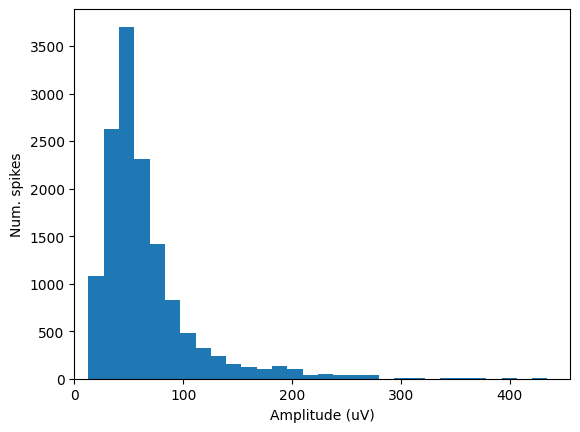

In [9]:
GAIN_TO_UV = 0.195
##
all_amps_uv = np.array(all_amps) * GAIN_TO_UV

plt.hist(all_amps_uv, bins=30)
plt.xlim(0)
plt.xlabel("Amplitude (uV)")
plt.ylabel("Num. spikes")
print(f"Median: {np.median(all_amps_uv)}")

print(f"IQR/2: {iqr(all_amps_uv)/2}")

plt.show()

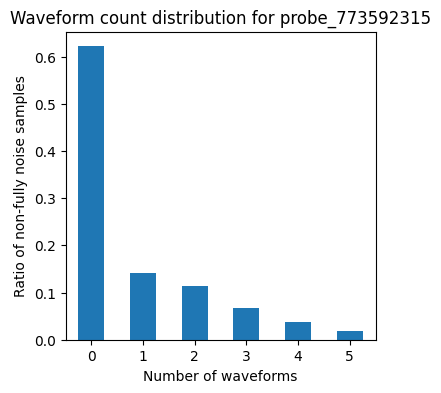

0: 62.2% 1: 14.1% 2: 11.3% 3: 6.8% 4: 3.7% 5: 1.9% 


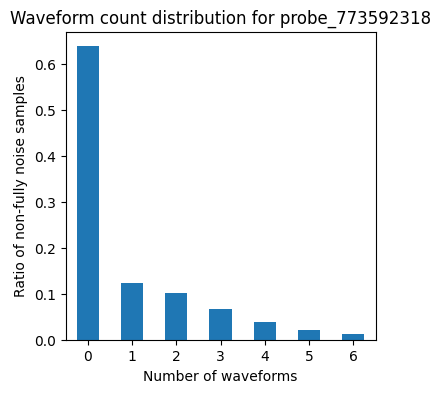

0: 63.8% 1: 12.3% 2: 10.1% 3: 6.6% 4: 3.9% 5: 2.1% 6: 1.2% 


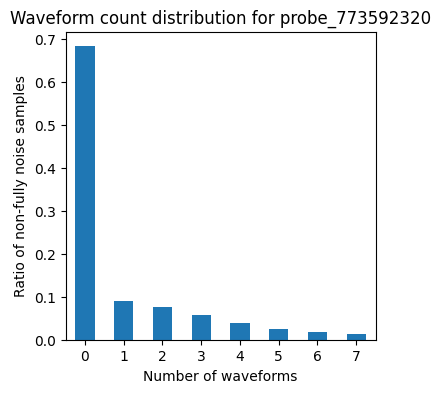

0: 68.3% 1: 8.9% 2: 7.6% 3: 5.8% 4: 3.9% 5: 2.6% 6: 1.7% 7: 1.2% 


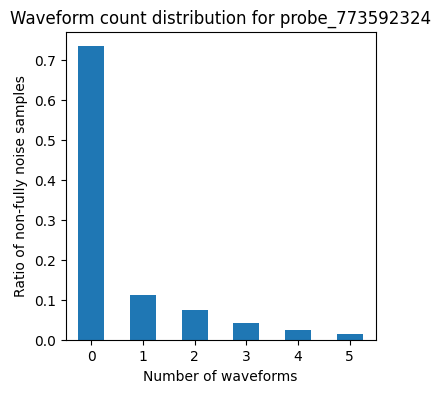

0: 73.4% 1: 11.1% 2: 7.4% 3: 4.3% 4: 2.4% 5: 1.3% 


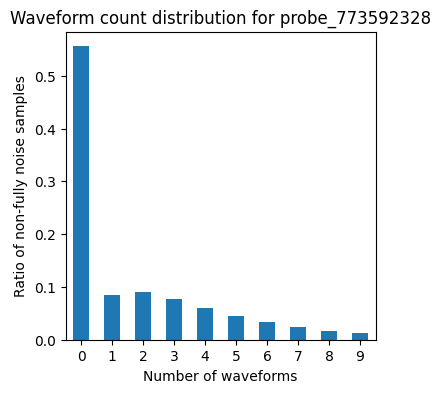

0: 55.6% 1: 8.5% 2: 9.0% 3: 7.8% 4: 6.1% 5: 4.5% 6: 3.3% 7: 2.4% 8: 1.7% 9: 1.2% 


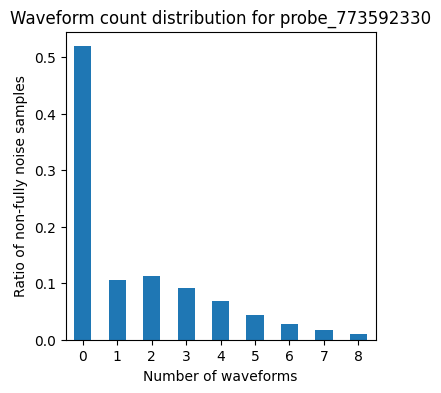

0: 51.9% 1: 10.6% 2: 11.3% 3: 9.2% 4: 6.9% 5: 4.4% 6: 2.9% 7: 1.8% 8: 1.0% 


In [137]:
# Plot each recording separately
MIN_COUNT = 0.01 * NUM_ELECS * NUM_SAMPLES  # a count has to have at least this many to count

rec_ratios_wfs = []
for nums_wfs, rec_path in zip(rec_num_wfs, REC_PATHS):   
    counts = np.array(list(nums_wfs.values()))
    mask = counts >= MIN_COUNT
    counts = counts[mask]
    ratios = counts/np.sum(counts)
     
    df = DataFrame(data={"Ratios": ratios}, index=np.array(list(nums_wfs.keys()))[mask])
    
    fig, axis = plt.subplots(1, figsize=(4, 4))
    df.plot.bar(rot=0, linewidth=5, ax=axis, legend=False)
    plt.title(f"Waveform count distribution for {rec_path.name}")
    plt.xlabel("Number of waveforms")
    plt.ylabel("Ratio of non-fully noise samples")
    plt.show()
    for count, ratio in enumerate(ratios):
        print(f"{count}: {ratio*100:.1f}%", end=" ")
    print()
    # for count, ratio in enumerate([r for r in ratios if r >= 0.01]):
    #     print(f"{count}: {ratio*100:.1f}%", end=" ")
    # for count, ratio in enumerate([r for r in ratios if r >= 0.01]):
    #     print(f"{count}: {ratio*100:.1f}%", end=" ")
    #     if count >= 6:
    #         break
    rec_ratios_wfs.append(ratios)

In [ ]:
# Plot all recordings together
%autoreload 2
import matplotlib.pyplot as plt
from pandas import DataFrame


nums_wfs_all = {}
total = 0
for nums_wfs in rec_num_wfs:
    for num, count in nums_wfs.items():
        if num not in nums_wfs_all:
            nums_wfs_all[num] = count
        else:
            nums_wfs_all[num] += count
        total += count
        
nums_wfs_all_sorted = {}
# nums_wfs_all_sorted[0] = 0.5
for count in sorted(nums_wfs_all.keys()):
    nums_wfs_all_sorted[count] = nums_wfs_all[count] / total # / 2

ratios = np.array(list(nums_wfs_all_sorted.values()))
df = DataFrame(data={"Ratios": ratios}, index=nums_wfs_all_sorted.keys())

fig, axis = plt.subplots(1, figsize=(4, 4))
df.plot.bar(rot=0, linewidth=5, ax=axis, legend=False)
# plt.title(f"Waveform count distribution across all {len(REC_PATHS)} recordings")
plt.xlabel("Number of waveforms")
plt.ylabel("Ratio of samples")
plt.show()

# ratios = [0.5] + (nonzero_ratios / 2).tolist()
print(ratios.tolist())

In [141]:
for ratios, rec_path in zip(rec_ratios_wfs, REC_PATHS):   
    np.save(rec_path / "num_wfs_probs.npy", ratios[ratios >= 0.01])
    # print(ratios)

In [ ]:
# TEST different parameters
NUM_ELECS = 100
NUM_SAMPLES = 2000
RMS_THRESH = 2  # Spike has to be greater than 

REC_PATHS = meta.SI_MOUSE[:]
SAMP_FREQ = 30

SAMPLE_SIZE = SAMP_FREQ * 6  # 200
RMS_SAMPLE_SIZE = SAMP_FREQ * 50
SPIKE_WITHIN = round(SAMP_FREQ * 0.5)  # Spike amp on elec is max amp within SPIKE_WITHIN of spike time 

BANDPASS_FILTER = BandpassFilter((300, 3000))
FILTER_MARGIN = SAMP_FREQ * 5  # Based on spikeinterface's value. Prevent edge effects in analyzed data

rms_n_before = rms_n_after = RMS_SAMPLE_SIZE // 2 + FILTER_MARGIN
sample_n_before = sample_n_after = SAMPLE_SIZE // 2

rec_num_wfs = []
for i, path in enumerate(REC_PATHS):
    print(f"Recording {i}")
    random_seed(3, silent=True)
    
    nums_wfs = {}
    rec = np.load(path / "traces.npy", mmap_mode="r")
    spike_times = np.sort(np.load(path / "sorted.npz", mmap_mode="r")["spike_times"])
    
    random_start_frame = rms_n_before
    random_end_frame = rec.shape[1]-rms_n_after
    
    for _ in tqdm(range(NUM_ELECS)):
        chan = random.randint(0, NUM_ELECS-1)    
        for _ in range(NUM_SAMPLES):
            mid_frame = random.randint(random_start_frame, random_end_frame)
            rms_window = rec[chan, mid_frame-rms_n_before:mid_frame+rms_n_after]
            median = np.median(rms_window)          
            rms_window = BANDPASS_FILTER(rms_window - median)
            rms = np.median(np.abs(rms_window)) / 0.6745
                        
            sample_window = rms_window[rms_n_before-sample_n_before:rms_n_after+sample_n_after]  
            
            spike_start_frame = mid_frame-sample_n_before
            spike_start_idx = np.searchsorted(spike_times, spike_start_frame, side="left")
            spike_end_idx = np.searchsorted(spike_times, mid_frame+sample_n_after, side="left") - 1
            # assert spike_times[spike_end_idx] - spike_times[spike_start_idx] <= 179  # No assertion should be raised
        
            count = 0
            times = []  # Testing
            for idx in range(spike_start_idx, spike_end_idx):
                frame = spike_times[idx] - spike_start_frame
                window = sample_window[max(0, frame-SPIKE_WITHIN):frame+SPIKE_WITHIN+1]
                # amp = np.abs(sample_window[frame])
                amp = np.max(np.abs(window))
                if amp >= rms * RMS_THRESH:
                    count += 1
                    n_before = SPIKE_WITHIN if frame-SPIKE_WITHIN >= 0 else frame
                    # times.append(np.argmin(sample_window[frame-n_before:frame+SPIKE_WITHIN+1]) - n_before + frame)  # Testing
                    times.append(frame)
                    
            # Testing
            # if count == 6:
            #     plt.plot(sample_window)
            #     plt.title(f"{count} spikes")
            #     for t in times:
            #         plt.axvline(t, color="black", alpha=0.6, linestyle="dashed")
            #     plt.show()
            #     assert False
            
            if count not in nums_wfs:
                nums_wfs[count] = 1
            else:
                nums_wfs[count] += 1

            
    # total = sum(c for c in nums_wfs.values())
    nums_wfs_sorted = {}
    for count in sorted(nums_wfs.keys()):
        nums_wfs_sorted[count] = nums_wfs[count] # / total
    
    rec_num_wfs.append(nums_wfs_sorted)
    
# Plot each recording separately
%autoreload 2
import matplotlib.pyplot as plt
from pandas import DataFrame


for nums_wfs, rec_path in zip(rec_num_wfs, REC_PATHS):   
    counts = np.array(list(nums_wfs.values()))
    ratios = counts/np.sum(counts)
     
    df = DataFrame(data={"Ratios": ratios}, index=nums_wfs.keys())
    
    fig, axis = plt.subplots(1, figsize=(4, 4))
    df.plot.bar(rot=0, linewidth=5, ax=axis, legend=False)
    plt.title(f"Waveform count distribution for {rec_path.name}")
    plt.xlabel("Number of waveforms")
    plt.ylabel("Ratio of non-fully noise samples")
    plt.show()
    for count, ratio in enumerate(ratios):
        print(f"{count}: {ratio*100:.1f}%", end=" ")
    print()
    # for count, ratio in enumerate([r for r in ratios if r >= 0.01]):
    #     print(f"{count}: {ratio*100:.1f}%", end=" ")
    for count, ratio in enumerate([r for r in ratios if r >= 0.01]):
        print(f"{count}: {ratio*100:.1f}%", end=" ")
        if count >= 6:
            break

## Mean and STD of synthetic samples
To normalize DL inputs

In [143]:
for rec_path in REC_PATHS:
    print(np.load(rec_path / "num_wfs_probs.npy"))

[0.62159368 0.14075972 0.1134124  0.06813911 0.03742558 0.0186695 ]
[0.63848071 0.1229259  0.10070909 0.06628497 0.03867765 0.02109505
 0.01182663]
[0.68268039 0.08919357 0.07624952 0.05770289 0.03877556 0.02579035
 0.01720386 0.01240386]
[0.73447086 0.11092966 0.07447371 0.04311529 0.02386476 0.01314571]
[0.55555956 0.08485582 0.09022084 0.0775221  0.06096323 0.04506919
 0.03304558 0.02359368 0.01672894 0.01244105]
[0.51925158 0.10648969 0.1125317  0.09188522 0.06858615 0.0443724
 0.02865506 0.01779571 0.01043249]


In [145]:
%autoreload 2
import matplotlib.pyplot as plt
import torch

from src import data
from src.plot import plot_hist_percents

In [162]:
cross_val = data.RecordingCrossVal(
    samples_per_waveform=2, front_buffer=60, end_buffer=60,
    num_wfs_probs=None, isi_wf_min=round(0.2*SAMP_FREQ), isi_wf_max=None,
    rec_paths=REC_PATHS, thresh_amp=19, thresh_std=np.inf,
    sample_size=300, start=0, ms_before=3, ms_after=3, gain_to_uv=0.195,
    device="cpu", dtype=torch.float16, mmap_mode="r",
    as_datasets=False
)

In [164]:
# Select cross val
rec, train, val = cross_val[0]
data.RecordingCrossVal.summarize(rec, train, val)

Val Recording: probe_773592315 - Train: 12754 samples - Val: 1694 - Train/Val: 13.3%
Train num wfs probs:
0: 62.6%, 1: 10.3%, 2: 9.1%, 3: 6.7%, 4: 4.6%, 5: 3.0%, 6: 1.8%, 7: 1.1%, 8: 0.5%, 9: 0.2%, 
Val num wfs probs:
0: 62.2%, 1: 14.1%, 2: 11.3%, 3: 6.8%, 4: 3.7%, 5: 1.9%, 

In [165]:
# Get stats
mean_mean, mean_std, means, stds = train.get_means_and_stds(NUM_SAMPLES)

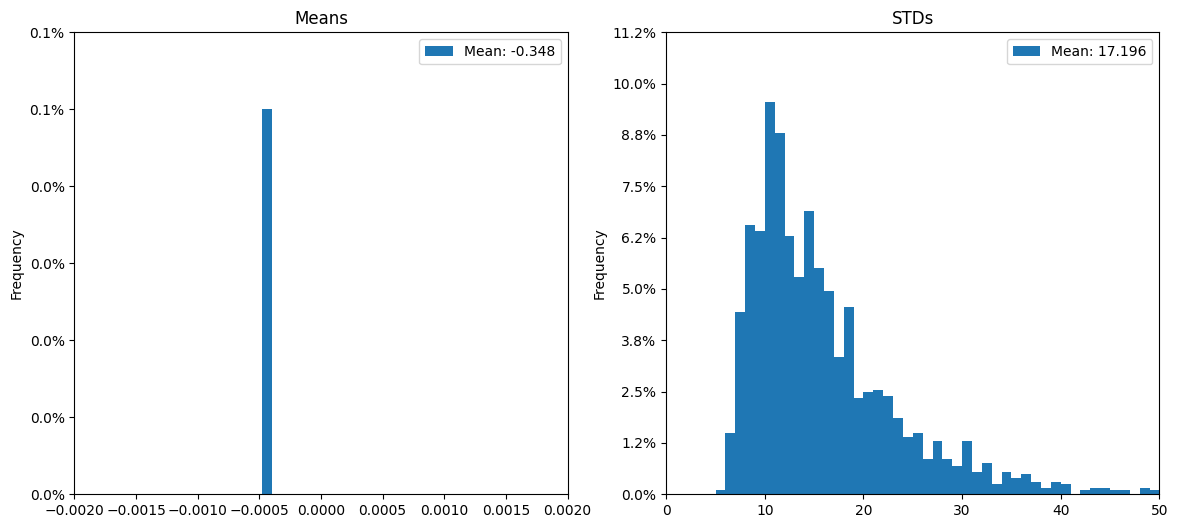

In [166]:
# Plot 
fig, (mean_axis, std_axis) = plt.subplots(1, 2, figsize=(14, 6))

mean_axis.set_title("Means")
plot_hist_percents(means, mean_axis, 
                   bins=50, label=f"Mean: {mean_mean:.3f}", range=(-0.002, 0.002))
mean_axis.legend()

std_axis.set_title("STDs")
plot_hist_percents(stds, std_axis, 
                   bins=50, label=f"Mean: {mean_std:.3f}", range=(0, 50))

std_axis.legend()
plt.show()


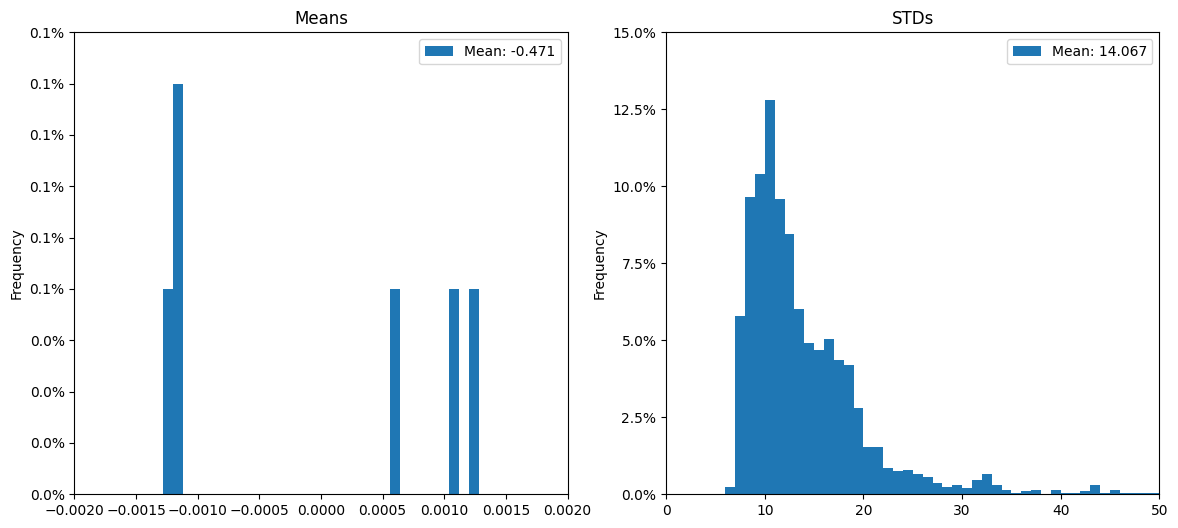

In [167]:
# Do it again but for val recording
mean_mean, mean_std, means, stds = val.get_means_and_stds(NUM_SAMPLES)

# Plot 
fig, (mean_axis, std_axis) = plt.subplots(1, 2, figsize=(14, 6))

mean_axis.set_title("Means")
plot_hist_percents(means, mean_axis, 
                   bins=50, label=f"Mean: {mean_mean:.3f}", range=(-0.002, 0.002))
mean_axis.legend()

std_axis.set_title("STDs")
plot_hist_percents(stds, std_axis, 
                   bins=50, label=f"Mean: {mean_std:.3f}", range=(0, 50))

std_axis.legend()
plt.show()

Using random seed 1


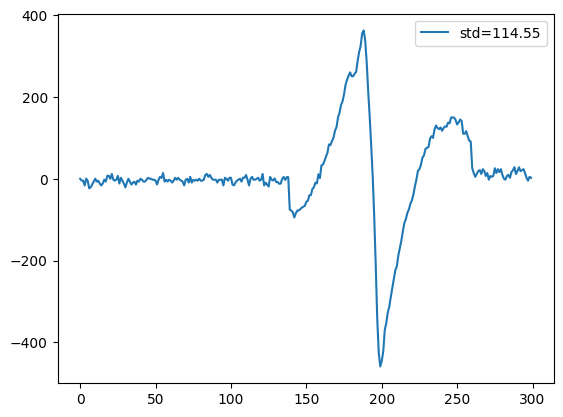

In [170]:
# Look at some large STD samples

from src import utils
utils.random_seed(1)

for i in range(len(train.dataset)):
    sample = train.dataset[i]
    trace = sample[0].flatten().cpu().numpy().astype("float32")
    std = np.std(trace)
    if std > 100:
        plt.plot(trace, label=f"std={std:.2f}")
        plt.legend()
        plt.show()
        break
    
    

In [65]:
train_mean, train_std = train.get_mean_and_std_across(NUM_SAMPLES)
val_mean, val_std = val.get_mean_and_std_across(NUM_SAMPLES)

print(f"Train mean across samples: {train_mean:.2f}")
print(f"Val mean across samples: {val_mean:.2f}")
print()
print(f"Train STD across samples: {train_std:.2f}")
print(f"Val STD across samples: {val_std:.2f}")

Train mean across samples: -0.00
Val mean across samples: -0.00

Train STD across samples: 23.70
Val STD across samples: 15.67


In [77]:
# Look at range of samples
mean_range, ranges = train.get_ranges(NUM_SAMPLES)

Median: 96.125


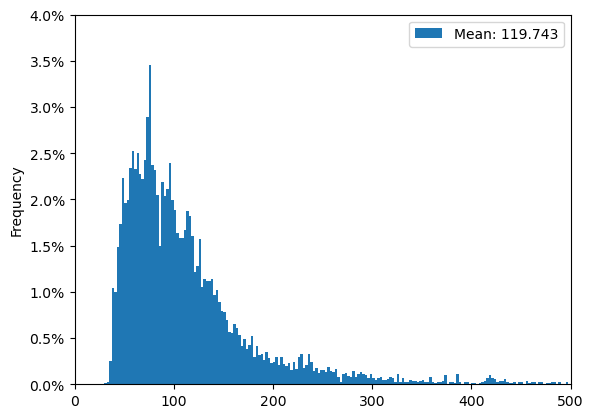

In [78]:
# Plot 
ax = plot_hist_percents(ranges, 
                        bins=200, label=f"Mean: {mean_range:.3f}", range=(0, 500))
print(f"Median: {np.median(ranges)}")
ax.legend()
plt.show()

### Plot distribution of wf amps
Mainly to check if it is scaled to uV or not

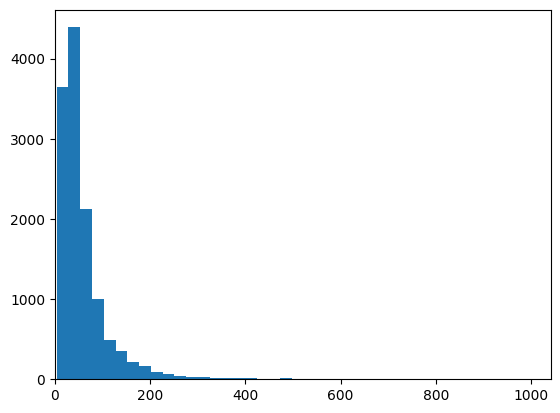

median: 41.753452


In [181]:
# All waveforms in train dataset
amps = []
for dataset in train.wf_datasets:
    for wf in dataset:
        wf = wf.waveform
        amps.append(np.abs(np.min(wf)))
plt.hist(amps, bins=40)
plt.xlim(0)
plt.show()
print("median:", np.median(amps))

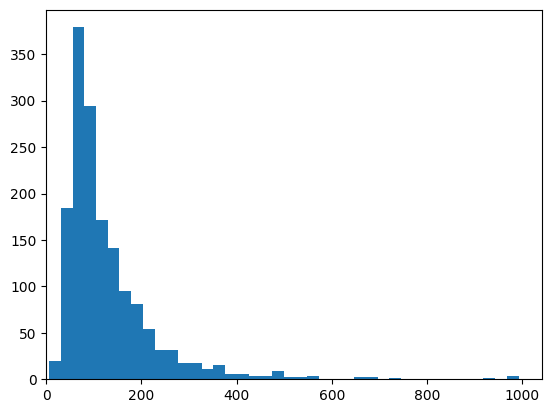

median: 97.40557
interquartile range/2: 43.34485054016113


In [21]:
# Only unit's TOP_N max-amp waveforms across all recordings
TOP_N = 1

amps = []
for rec_path in REC_PATHS:
    sorted = np.load(rec_path / "sorted.npz", allow_pickle=True)
    for unit in sorted["units"]:
        unit_amps = np.abs(np.min(unit["template"], axis=0))
        unit_amps = np.sort(unit_amps)
        amps.extend(unit_amps[-TOP_N:])
        
plt.hist(amps, bins=40)
plt.xlim(0)
plt.show()
print("median:", np.median(amps))
print("interquartile range/2:", iqr(amps)/2)